https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home

**Identification**  

| Variable | Description   |
|------|------|
|   Primary key  | combination of year and state name|
|   Year  | |
|   State  | |


In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
df = pd.read_csv('useducation.csv')

### 1)  Determine all the variable types and find the fraction of the missing values for each variable.

First, look at the data types pandas has automatically determined.  There are 2 objects and the rest are integers or floats.  Based on the descriptions given on Kaggle, these make sense. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

Looking at the first five rows confirms that the data types are correct.  But, see a lot of null values already, especially in the 'Enroll' column.

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
print(tabulate([[i, df[i].isnull().sum()/df.shape[0] * 100, df[i].nunique()] for i in df.columns], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column                       |   Percent Missing |   Unique Values |
|------------------------------+-------------------+-----------------|
| PRIMARY_KEY                  |           0       |            1487 |
| STATE                        |           0       |              80 |
| YEAR                         |           0       |              26 |
| ENROLL                       |          17.6273  |            1224 |
| TOTAL_REVENUE                |          14.2091  |            1274 |
| FEDERAL_REVENUE              |          14.2091  |            1275 |
| STATE_REVENUE                |          14.2091  |            1251 |
| LOCAL_REVENUE                |          14.2091  |            1275 |
| TOTAL_EXPENDITURE            |          14.2091  |            1275 |
| INSTRUCTION_EXPENDITURE      |          14.2091  |            1275 |
| SUPPORT_SERVICES_EXPENDITURE |          14.2091  |            1275 |
| OTHER_EXPENDITURE            |          17.6273  |            1222 |
| CAPI

The above table lists the variable, percent missing in the column, and the number of unique values.  The only variables without any null values are the primary key, state, and year.  

### 2) Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

To impute missing values without messing up the raw data, I create a copy of the original dataframe and drop the year in the copy.

In [6]:
df_2 = df.copy()
df_2.drop('YEAR', inplace=True, axis = 1)

#### 2.1 - State
Since for this problem, we are ignoring year, I will create a copy of the raw data to drop the year column.  

The first variable to go through is the state variable.  There are 80 unique variables but to my knowledge there are only 50 states.  To see what's going on, I'll look at the sorted list of states.

In [7]:
df_2 = df.copy()
df_2.drop('YEAR', axis = 1, inplace = True)
sorted(df_2['STATE'].unique())

['ALABAMA',
 'ALASKA',
 'AMERICAN_SAMOA',
 'ARIZONA',
 'ARKANSAS',
 'AS',
 'BI',
 'BIE',
 'BUREAU_OF_INDIAN_AFFAIRS',
 'BUREAU_OF_INDIAN_EDUCATIO',
 'BUREAU_OF_INDIAN_EDUCATION',
 'CALIFORNIA',
 'COLORADO',
 'COMMONWEALTH_OF_MARIANAS',
 'CONNECTICUT',
 'DD',
 'DELAWARE',
 'DEPARTMENT_OF_DEFENSE',
 'DEPARTMENT_OF_DEFENSE_EDUCATION_ACTIVITY',
 'DISTRICT_OF_COLUMBIA',
 'DOD',
 'DOD_(OVERSEAS_AND_DOMESTIC_COMBINED)',
 'DOD_-_DOMESTIC',
 'DOD_-_FOREIGN',
 'DOD_-_OVERSEAS',
 'DOD_DOMESTIC',
 'DOD_OVERSEAS',
 'FLORIDA',
 'GEORGIA',
 'GU',
 'GUAM',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'IOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARIANAS',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'MP',
 'NEBRASKA',
 'NEVADA',
 'NEW_HAMPSHIRE',
 'NEW_JERSEY',
 'NEW_MEXICO',
 'NEW_YORK',
 'NORTHERN_MARIANAS',
 'NORTHERN_MARIANA_ISLANDS',
 'NORTH_CAROLINA',
 'NORTH_DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'PR',
 '

There are a variety of reasons why there are 80 states instead of 50.  The first is that I didn't think to include U.S territories (e.g. Virgin Islands, Guam, etc.) in my count.  The second is that there are typos, such as 'BUREAU_OF_INDIAN_EDUCATIO' instead of 'education'.  Lastly, some of the territories are referred to by their full name (e.g. Virgin Islands, DOD_OVERSEAS), and others are by an abbreviation or with different punctuation (e.g. VI, DOD_-_OVERSEAS).  Clearly, the state names must be cleaned.  

The first step would be to remove punctuation to easily clear up values such as DOD_OVERSEAS and DOD_-_OVERSEAS.  The next step is to correct any misspellings and convert abbreviations.

In [8]:
df_2['STATE'] = df_2['STATE'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [9]:
states_dict = {'AS': 'AMERICANSAMOA', 'BI': 'BUREAUOFINDIANAFFAIRS', 'BUREAUOFINDIANEDUCATIO': 'BUREAUOFINDIANEDUCATION', 
              'DD': 'DEPARTMENTOFDEFENSE', 'DOD': 'DEPARTMENTOFDEFENSE', 'GU': 'GUAM', 'PR': 'PUERTORICO', 'VI': 'VIRGINISLANDS',
              'USVIRGINISLANDS': 'VIRGINISLANDS', 'MP': 'COMMONWEALTHOFMARIANAS', 'BIE': 'BUREAUOFINDIANEDUCATION'}
def correct_states(col):
    if col in states_dict.keys():
        return states_dict[col]
    elif 'MARIANA' in col:
        return 'COMMONWEALTHOFMARIANAS'
    else:
        return col

In [10]:
df_2['STATE'] = df_2['STATE'].apply(correct_states)

After removing punctuations and other corrections, I get a total of 64 unique states.  

In [11]:
df_2['STATE'].nunique()

64

I wanted to see which states had a lot of missing values, so I showed all the states with more than 50% missing values, seen below.  Most of these only have valid entries for grades.  Anything pertaining to finances, enrollment, or average scores are not entered.  The one exception to this is the 'DODOVERSEASANDDOMESTICCOMBINED' state, where there is 91% missing values.  This state repeats information from 'DODOVERSEAS' and 'DODDOMESTIC', so I will delete this state.  

In [12]:
state_df = pd.DataFrame()
state_df['State'] = [state for state in df_2['STATE'].unique()]
state_df['State Missing Values'] = [df_2[df_2['STATE']==state].isnull().sum().sum()/(df_2[df_2['STATE']==state].shape[0]*df_2[df_2['STATE']==state].shape[1])*100 for state in df_2['STATE'].unique()]

In [13]:
state_df[state_df['State Missing Values'] > 50].sort_values('State Missing Values', ascending=False)

,State,State Missing Values
62,DODOVERSEASANDDOMESTICCOMBINED,91.666667
60,BUREAUOFINDIANEDUCATION,81.666667
59,DEPARTMENTOFDEFENSE,80.555556
51,BUREAUOFINDIANAFFAIRS,77.083333
54,AMERICANSAMOA,69.927536
58,VIRGINISLANDS,67.708333
55,GUAM,65.277778
52,DODOVERSEAS,65.000000
53,DODDOMESTIC,61.666667
56,COMMONWEALTHOFMARIANAS,58.333333


In [14]:
df_2[df_2['STATE']=='COMMONWEALTHOFMARIANAS']

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1290,2001_NORTHERN_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,832.0,779.0,432.0,6773.0,2464.0,9760.0,NaN,NaN,NaN,NaN
1297,2012_NORTHERN_MARIANA_ISLANDS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,776.0,792.0,630.0,6297.0,3250.0,10009.0,NaN,NaN,NaN,NaN
1314,2010_NORTHERN_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,841.0,816.0,716.0,6569.0,3417.0,10448.0,NaN,NaN,NaN,NaN
1319,2008_NORTHERN_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,819.0,824.0,537.0,6658.0,3097.0,10217.0,NaN,NaN,NaN,NaN
1327,2005_NORTHERN_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,870.0,810.0,682.0,7044.0,3291.0,10915.0,NaN,NaN,NaN,NaN
1333,1997_COMMONWEALTH_OF_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,799.0,585.0,500.0,6030.0,2062.0,8680.0,NaN,NaN,NaN,NaN
1338,1995_NORTHERN_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,683.0,596.0,467.0,5667.0,1984.0,8211.0,NaN,NaN,NaN,NaN
1345,1998_MP,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,791.0,650.0,352.0,6270.0,2078.0,8874.0,NaN,NaN,NaN,NaN
1354,2003_NORTHERN_MARIANAS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,841.0,776.0,596.0,6857.0,3052.0,10494.0,NaN,NaN,NaN,NaN
1361,2013_NORTHERN_MARIANA_ISLANDS,COMMONWEALTHOFMARIANAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,750.0,814.0,656.0,6265.0,3298.0,10025.0,NaN,NaN,NaN,NaN


In [15]:
df_2 = df_2[df_2['STATE'] != 'DODOVERSEASANDDOMESTICCOMBINED']

In [16]:
df_2.reset_index(drop = True,inplace = True)

#### 2.2 - Enrollments
According to the data description, column 'GRADES_ALL' is comparable to the 'ENROLL' column.  Thus, I will insert the value from the other column when possible.

In [17]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in ['ENROLL', 'GRADES_ALL_G']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column       |   Percent Missing |   Unique Values |
|--------------+-------------------+-----------------|
| ENROLL       |           17.5721 |            1224 |
| GRADES_ALL_G |           11.5359 |            1318 |


In [18]:
df_2['GRADES_ALL_G'].fillna(df_2['ENROLL'], inplace = True)

In [19]:
df_2['ENROLL'].fillna(df_2['GRADES_ALL_G'], inplace = True)

In [20]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in ['ENROLL', 'GRADES_ALL_G']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column       |   Percent Missing |   Unique Values |
|--------------+-------------------+-----------------|
| ENROLL       |           7.44467 |            1375 |
| GRADES_ALL_G |           7.44467 |            1379 |


There are still ~7.5% missing values in the two columns. But since the two columns are now redundant, I can delete one of them.  'Grades all' is related to other columns, so I will delete 'enroll'. 

In [21]:
df_2.drop('ENROLL', axis = 1, inplace=True)

#### 2.3 - Grades
Grades, as mentioned in section 2.2, is how many students are enrolled.  'Grades all' represents the total enrollment as measured by NCES.  'Grades 1_8' and 'Grades 9_12' represents the total number of students in grades 1-8 and 9-12 respectively.  Lastly, Grades PK, KG, 4, 8, and 12 represent the number of students in pre-kindergarten, kindergarten, 4th, 8th, and 12th grade respectively.  

I wondered if it would make sense to add the columns 'Grades 1_8' and 'Grades 9_12' to get a number for 'Grades all'.  Just to see if this method is even remotely valid, I found the mean and medians from adding grades 1-12 and from all grades, and calculated the percent difference.  

In [22]:
def percent_diff(val1, val2):
    num = val1-val2
    den = (val1 + val2)/2
    return num/den*100

In [23]:
grades_lst = ['GRADES_PK_G',
       'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G',
       'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']

In [24]:
df_2[(df_2['STATE'] == 'OREGON')][grades_lst].head()

,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
38,771.0,37519.0,41443.0,39610.0,31920.0,325128.0,144002.0,469901.0
90,837.0,37859.0,41290.0,39500.0,32828.0,327629.0,147819.0,476285.0
112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574252.0
142,1069.0,38930.0,41739.0,40473.0,33356.0,330390.0,149412.0,480871.0
195,855.0,39875.0,41721.0,42141.0,33202.0,333673.0,151386.0,485914.0


In [25]:
grades_added_mean = df_2[['GRADES_1_8_G', 'GRADES_9_12_G']].apply(lambda x: sum(x), axis = 1).mean()
grades_all_mean = df_2['GRADES_ALL_G'].mean()
print('Mean of added grades: {}'.format(grades_added_mean))
print('Mean of all grades: {}'.format(grades_all_mean))
print('Percent difference in mean: {}'.format(percent_diff(grades_added_mean, grades_all_mean)))

Mean of added grades: 766285.3879500368
Mean of all grades: 807619.35
Percent difference in mean: -5.25240963488037


In [26]:
grades_added_median = df_2[['GRADES_1_8_G', 'GRADES_9_12_G']].apply(lambda x: sum(x), axis = 1).median()
grades_all_median = df_2['GRADES_ALL_G'].median()
print('Median of added grades: {}'.format(grades_added_median))
print('Median of all grades: {}'.format(grades_all_median))
print('Percent difference in median: {}'.format(percent_diff(grades_added_median, grades_all_median)))

Median of added grades: 519166.0
Median of all grades: 550380.5
Percent difference in median: -5.836959870374967


Although the means and medians are pretty far from each other, indicating potentially skewed data, the percent differences are ~5.5%.  For both mean and medians, 'Grades all' was higher number.  For this exercise, I will say it is a valid method to add 'Grades 1_8' and 'Grades 9_12' plus some percentage (this will be calculated by state) to estimate , or vice versa where 'Grades all' can be used to estimate the two grades.  

Before I do that though, I wanted to see which states have values in 'Grades 1_8' and 'Grades 8_12' but missing values in 'Grades all'.  

In [27]:
df_2[df_2['GRADES_ALL_G'].isnull() & df_2['GRADES_9_12_G'].notnull()]['STATE'].value_counts()

VIRGINISLANDS              23
BUREAUOFINDIANAFFAIRS       6
BUREAUOFINDIANEDUCATION     2
WYOMING                     1
Name: STATE, dtype: int64

Interestingly, there are 4 states with these conditions, and 3 of them have over 50% missing values (everything except Wyoming).  Originally, I didn't think there was much I could do to salvage those missing values, but now I am glad I didn't discount these states 

In [28]:
def est_grades_all(state, lower_grade, upper_grade):
    val1 = df_2[df_2['STATE'] == state][['GRADES_1_8_G', 'GRADES_9_12_G']].apply(lambda x: sum(x), axis = 1).median()
    val2 = df_2[df_2['STATE'] == state]['GRADES_ALL_G'].median()
    if not pd.isna(val2):
        grade_all = (lower_grade + upper_grade) * ((percent_diff(val1, val2) * -1)/100 + 1)
    else:
        grade_all = lower_grade + upper_grade
    return grade_all

In [29]:
for state in ['VIRGINISLANDS', 'BUREAUOFINDIANAFFAIRS', 'BUREAUOFINDIANEDUCATION', 'WYOMING']:
    condition = ((df_2['STATE'] == state) & (df_2['GRADES_1_8_G'].notnull()) & (df_2['GRADES_ALL_G'].isnull()))
    df_2.loc[condition, 'GRADES_ALL_G'] = df_2.loc[condition].apply(lambda row: est_grades_all(state, row['GRADES_1_8_G'], row['GRADES_9_12_G']), axis = 1)

In [30]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in ['GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column        |   Percent Missing |   Unique Values |
|---------------+-------------------+-----------------|
| GRADES_1_8_G  |           8.71898 |            1360 |
| GRADES_9_12_G |           8.71898 |            1358 |
| GRADES_ALL_G  |           5.29846 |            1410 |


After applying these ideas, the percent of missing values in 'Grades all' reduced to ~5.3%.  

Lastly, I wanted to see if I could estimate the enrollment numbers in 'Grades 1_8' and 'Grades 9_12'.  I suspect it will be a percentage of 'Grades all'.  Below are two boxplots showing the range in percent for 'Grades 1_8' and 'Grades 9_12' based off 'Grades all'.  There is some variance but for the most part, not too large.  Imputing the this percent multiplied by 'Grades all' should be a good starting point.

In [31]:
def get_grade_percents(state, grades_sub, get_median = True):
    if get_median:
        return (df_2[df_2['STATE']== state][grades_sub]/df_2[df_2['STATE']==state]['GRADES_ALL_G']).median()
    else:
        return df_2[df_2['STATE']== state][grades_sub]/df_2[df_2['STATE']==state]['GRADES_ALL_G']


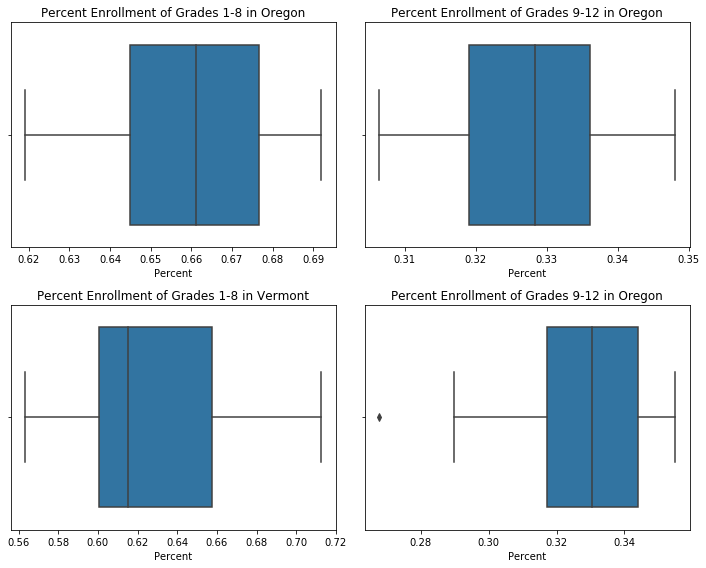

In [32]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(10,8))

sns.boxplot(x = get_grade_percents('OREGON', 'GRADES_1_8_G', False), ax = axis1)
sns.boxplot(x = get_grade_percents('OREGON', 'GRADES_9_12_G', False), ax = axis2)
sns.boxplot(x = get_grade_percents('VERMONT', 'GRADES_1_8_G', False), ax = axis3)
sns.boxplot(x = get_grade_percents('VERMONT', 'GRADES_9_12_G', False), ax = axis4)

axis1.set_title('Percent Enrollment of Grades 1-8 in Oregon')
axis2.set_title('Percent Enrollment of Grades 9-12 in Oregon')
axis3.set_title('Percent Enrollment of Grades 1-8 in Vermont')
axis4.set_title('Percent Enrollment of Grades 9-12 in Oregon')

for ax in [axis1, axis2, axis3, axis4]:
    ax.set_xlabel('Percent')
    
plt.tight_layout()

In [33]:
states_est_grades_list = df_2[df_2['GRADES_ALL_G'].notnull() & df_2['GRADES_1_8_G'].isnull()]['STATE'].unique()

In [34]:
for state in states_est_grades_list:
    condition = ((df_2['STATE'] == state) & (df_2['GRADES_ALL_G'].notnull()) & (df_2['GRADES_1_8_G'].isnull()))
    df_2.loc[condition, 'GRADES_1_8_G'] = df_2.loc[condition].apply(lambda row: row['GRADES_ALL_G'] * get_grade_percents(state, 'GRADES_1_8_G') if pd.isna(row['GRADES_1_8_G']) else row['GRADES_1_8_G'], axis =1)
    df_2.loc[condition, 'GRADES_9_12_G'] = df_2.loc[condition].apply(lambda row: row['GRADES_ALL_G'] * get_grade_percents(state, 'GRADES_9_12_G') if pd.isna(row['GRADES_9_12_G']) else row['GRADES_9_12_G'], axis =1)

In [35]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in ['GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column        |   Percent Missing |   Unique Values |
|---------------+-------------------+-----------------|
| GRADES_1_8_G  |           5.29846 |            1411 |
| GRADES_9_12_G |           5.29846 |            1409 |
| GRADES_ALL_G  |           5.29846 |            1410 |


After applying these conditions, missing values of 'Grades 1_8' and 'Grades 9_12' are also reduced to ~5.3%.  I'm sure a similar approach could be applied to the other grades, but for brevity of this exercise, I will choose not to fill in those missing values.  As such, I will delete these rows.  

In [36]:
df_2.drop(['GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G'], axis = 1, inplace = True)

The rest of the missing values will be filled in with the median values of each state.

In [37]:
states_all_list = df_2['STATE'].unique()

In [38]:
for state in states_all_list:
    df_2.loc[df_2['STATE']==state, 'GRADES_1_8_G'] = df_2.loc[df_2['STATE']==state, 'GRADES_1_8_G'].fillna(df_2[df_2['STATE']==state]['GRADES_1_8_G'].median())
    df_2.loc[df_2['STATE']==state, 'GRADES_9_12_G'] = df_2.loc[df_2['STATE']==state, 'GRADES_9_12_G'].fillna(df_2[df_2['STATE']==state]['GRADES_9_12_G'].median())
    df_2.loc[df_2['STATE']==state, 'GRADES_ALL_G'] = df_2.loc[df_2['STATE']==state, 'GRADES_ALL_G'].fillna(df_2[df_2['STATE']==state]['GRADES_ALL_G'].median())

In [39]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in ['GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column        |   Percent Missing |   Unique Values |
|---------------+-------------------+-----------------|
| GRADES_1_8_G  |                 0 |            1416 |
| GRADES_9_12_G |                 0 |            1414 |
| GRADES_ALL_G  |                 0 |            1415 |


#### 2.4 - Revenues and Expenditures
Most of the columns regarding revenues and expenditures have the same percent of missing values, at 14.2%.  This tells me that most likely the whole row is missing regarding finances.  There is however, one expenditure that has 17.6% missing values, which is the 'other expenditure' column.  My guess on why the percent of missing value is higher is because there are some rows where the other expendetures are \$0 but got inputted as a null value.  To correct this, I will fill in $0 to any row with a value in total revenue.

In [40]:
finance_list = ['TOTAL_REVENUE', 'FEDERAL_REVENUE',
       'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']

In [41]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in finance_list], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column                       |   Percent Missing |   Unique Values |
|------------------------------+-------------------+-----------------|
| TOTAL_REVENUE                |           14.1516 |            1274 |
| FEDERAL_REVENUE              |           14.1516 |            1275 |
| STATE_REVENUE                |           14.1516 |            1251 |
| LOCAL_REVENUE                |           14.1516 |            1275 |
| TOTAL_EXPENDITURE            |           14.1516 |            1275 |
| INSTRUCTION_EXPENDITURE      |           14.1516 |            1275 |
| SUPPORT_SERVICES_EXPENDITURE |           14.1516 |            1275 |
| OTHER_EXPENDITURE            |           17.5721 |            1222 |
| CAPITAL_OUTLAY_EXPENDITURE   |           14.1516 |            1275 |


In [42]:
df_2.loc[(df_2['OTHER_EXPENDITURE'].isnull() & df_2['TOTAL_REVENUE'].notnull()), 'OTHER_EXPENDITURE'] = df_2.loc[(df_2['OTHER_EXPENDITURE'].isnull() & df_2['TOTAL_REVENUE'].notnull()), 'OTHER_EXPENDITURE'].fillna(0)

The rest of the missing values will be filled in with the median values by state.  This reduces the percent of missing values to ~10.5%.  The states that have missing values never had an entry to begin with, so it would be inappropriate to impute a value.

In [43]:
for state in states_all_list:
    for col in finance_list:
        df_2.loc[df_2['STATE']==state, col] = df_2.loc[df_2['STATE']==state, col].fillna(df_2[df_2['STATE']==state][col].median())

In [44]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in finance_list], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column                       |   Percent Missing |   Unique Values |
|------------------------------+-------------------+-----------------|
| TOTAL_REVENUE                |           10.7311 |            1275 |
| FEDERAL_REVENUE              |           10.7311 |            1276 |
| STATE_REVENUE                |           10.7311 |            1251 |
| LOCAL_REVENUE                |           10.7311 |            1276 |
| TOTAL_EXPENDITURE            |           10.7311 |            1276 |
| INSTRUCTION_EXPENDITURE      |           10.7311 |            1276 |
| SUPPORT_SERVICES_EXPENDITURE |           10.7311 |            1276 |
| OTHER_EXPENDITURE            |           10.7311 |            1224 |
| CAPITAL_OUTLAY_EXPENDITURE   |           10.7311 |            1276 |


In [45]:
df_2[df_2['TOTAL_REVENUE'].isnull()]['STATE'].value_counts()

VIRGINISLANDS                           24
PUERTORICO                              24
GUAM                                    24
AMERICANSAMOA                           23
COMMONWEALTHOFMARIANAS                  22
DODDOMESTIC                             10
DODOVERSEAS                             10
BUREAUOFINDIANAFFAIRS                   10
DEPARTMENTOFDEFENSE                      6
BUREAUOFINDIANEDUCATION                  5
DODFOREIGN                               1
DEPARTMENTOFDEFENSEEDUCATIONACTIVITY     1
Name: STATE, dtype: int64

#### 2.5 - Average Math and Reading Scores
According to the description, the math and reading scores are taken every few years, so missing values are actually expected! I'm not entirely sure how to handle this if we are ignoring year.  Filling in median scores by state will suffice for now. 

In [46]:
for state in states_all_list:
    df_2.loc[df_2['STATE']== state, 'AVG_MATH_4_SCORE'] = df_2.loc[df_2['STATE']== state, 'AVG_MATH_4_SCORE'].fillna(df_2[df_2['STATE']== state]['AVG_MATH_4_SCORE'].median())
    df_2.loc[df_2['STATE']== state, 'AVG_MATH_8_SCORE'] = df_2.loc[df_2['STATE']== state, 'AVG_MATH_8_SCORE'].fillna(df_2[df_2['STATE']== state]['AVG_MATH_8_SCORE'].median())
    df_2.loc[df_2['STATE']== state, 'AVG_READING_4_SCORE'] = df_2.loc[df_2['STATE']== state, 'AVG_READING_4_SCORE'].fillna(df_2[df_2['STATE']== state]['AVG_READING_4_SCORE'].median())
    df_2.loc[df_2['STATE']== state, 'AVG_READING_8_SCORE'] = df_2.loc[df_2['STATE']== state, 'AVG_READING_8_SCORE'].fillna(df_2[df_2['STATE']== state]['AVG_READING_8_SCORE'].median())

In [47]:
print(tabulate([[i, df_2[i].isnull().sum()/df_2.shape[0] * 100, df_2[i].nunique()] for i in ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column              |   Percent Missing |   Unique Values |
|---------------------+-------------------+-----------------|
| AVG_MATH_4_SCORE    |           10.7311 |             550 |
| AVG_MATH_8_SCORE    |           10.7311 |             544 |
| AVG_READING_4_SCORE |           10.7311 |             548 |
| AVG_READING_8_SCORE |           10.7311 |             532 |


Again, there are ~10.5% missing values for these columns.  In fact, its the exact same percentage as seen with the financial related columns.  These U.S. territories never had a value inputed.  

### 3 - Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

Analysis for question 3 starts off similarly to question 2 by making a copy, correcting state names, and deleting states with no information. The only difference is that I do not delete the 'Year' column.

In [48]:
df_3 = df.copy()
df_3['STATE'] = df_3['STATE'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_3['STATE'] = df_3['STATE'].apply(correct_states)
df_3 = df_3[df_3['STATE'] != 'DODOVERSEASANDDOMESTICCOMBINED']
df_3.reset_index(drop = True,inplace = True)

#### 3.1 - Enrollments
Treatment of enrollments here is also the same as question 2.

In [49]:
df_3['ENROLL'].fillna(df_3['GRADES_ALL_G'], inplace = True)
df_3['GRADES_ALL_G'].fillna(df_3['ENROLL'], inplace = True)
df_3.drop('ENROLL', axis = 1, inplace = True)

#### 3.2 - Grades
The first part of the grades section is the same as Question 2, since it is most accurate to estimate 'Grades all' by adding 'Grades 1_8' and 'Grades 9_12'.  I will also drop the same columns as in Question 2.

In [50]:
df_3.drop(['GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G'], axis = 1, inplace = True)

In [51]:
for state in ['VIRGINISLANDS', 'BUREAUOFINDIANAFFAIRS', 'BUREAUOFINDIANEDUCATION', 'WYOMING']:
    condition = ((df_3['STATE'] == state) & (df_3['GRADES_1_8_G'].notnull()) & (df_3['GRADES_ALL_G'].isnull()))
    df_3.loc[condition, 'GRADES_ALL_G'] = df_3.loc[condition].apply(lambda row: est_grades_all(state, row['GRADES_1_8_G'], row['GRADES_9_12_G']), axis = 1)

Now that we have a time component, lets see how 'Grades 1_8' and 'Grades 9_12' have changed over time in Oregon and Vermont.

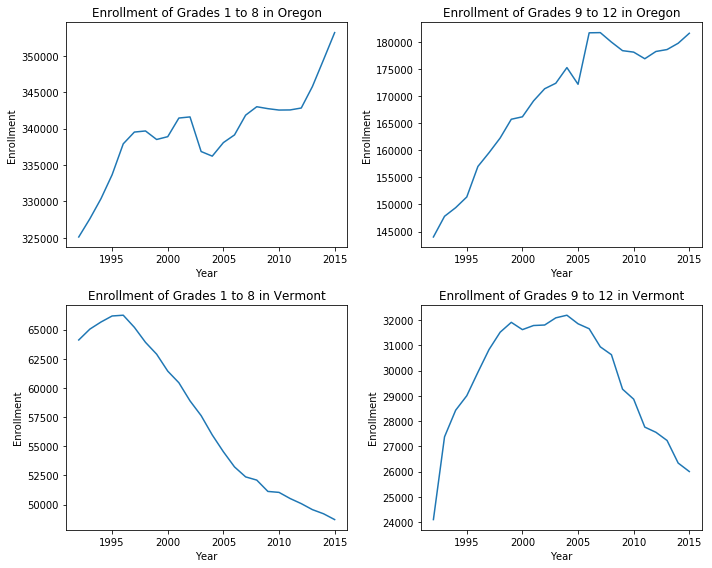

In [52]:
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2,2,figsize=(10,8))

sns.lineplot(x = 'YEAR', y = 'GRADES_1_8_G', data = df_3[df_3['STATE']=='OREGON'], ax = axis1)
sns.lineplot(x = 'YEAR', y = 'GRADES_9_12_G', data = df_3[df_3['STATE']=='OREGON'], ax = axis2)
sns.lineplot(x = 'YEAR', y = 'GRADES_1_8_G', data = df_3[df_3['STATE']=='VERMONT'], ax = axis3)
sns.lineplot(x = 'YEAR', y = 'GRADES_9_12_G', data = df_3[df_3['STATE']=='VERMONT'], ax = axis4)

axis1.set_title('Enrollment of Grades 1 to 8 in Oregon')
axis2.set_title('Enrollment of Grades 9 to 12 in Oregon')
axis3.set_title('Enrollment of Grades 1 to 8 in Vermont')
axis4.set_title('Enrollment of Grades 9 to 12 in Vermont')

for ax in [axis1, axis2, axis3, axis4]:
    ax.set_ylabel('Enrollment')
    ax.set_xlabel('Year')

plt.tight_layout()

As you can see, enrollments for each grade varies over the years, and imputing the average is not a good technique.  In addition, I show below that most of the states (aside from the territories) only have 2 missing values for 'Grades 1_8' (the same can be said for 'Grades 9_12' and 'Grades all').  If you look at the above graphs, they end in year 2015.  However, the dataset goes up to year 2017.  The data has not been entered for the last two years.  

In [53]:
df_3[df_3['GRADES_1_8_G'].isnull()]['STATE'].value_counts()

AMERICANSAMOA              8
GUAM                       5
DEPARTMENTOFDEFENSE        4
BUREAUOFINDIANAFFAIRS      4
BUREAUOFINDIANEDUCATION    3
KANSAS                     2
ARKANSAS                   2
RHODEISLAND                2
HAWAII                     2
ALASKA                     2
MASSACHUSETTS              2
MINNESOTA                  2
IDAHO                      2
INDIANA                    2
OHIO                       2
MICHIGAN                   2
NEWJERSEY                  2
MARYLAND                   2
NORTHDAKOTA                2
WYOMING                    2
CONNECTICUT                2
GEORGIA                    2
ARIZONA                    2
TENNESSEE                  2
NORTHCAROLINA              2
COLORADO                   2
DODOVERSEAS                2
DISTRICTOFCOLUMBIA         2
OREGON                     2
NEWHAMPSHIRE               2
UTAH                       2
DELAWARE                   2
SOUTHCAROLINA              2
MAINE                      2
MISSOURI      

A very simplified way to impute the enrollment data for 2016 and 2017 is to analyze what kind of trend the enrollment had in 2012-2015 and assume the enrollment will have the same trend.  A similar approach can be used for any year as long as there are data points in the year before and/or after the target year.

In [54]:
def get_grade_regression(year, state, grade):
    try:
        x = [year-2, year-1]
        y = [df_3[(df_3['YEAR'] == year-2) & (df_3['STATE'] == state)][grade].values[0], df_3[(df_3['YEAR'] == year-1) & (df_3['STATE'] == state)][grade].values[0]]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        return slope * year + intercept 

    except:
        pass
    
for i in range(2):
    df_3.loc[df_3['GRADES_1_8_G'].isnull(), 'GRADES_1_8_G'] = df_3.loc[df_3['GRADES_1_8_G'].isnull()].apply(lambda row: get_grade_regression(row['YEAR'], row['STATE'], 'GRADES_1_8_G'), axis = 1)
    df_3.loc[df_3['GRADES_9_12_G'].isnull(), 'GRADES_9_12_G'] = df_3.loc[df_3['GRADES_9_12_G'].isnull()].apply(lambda row: get_grade_regression(row['YEAR'], row['STATE'], 'GRADES_9_12_G'), axis = 1)
    df_3.loc[df_3['GRADES_ALL_G'].isnull(), 'GRADES_ALL_G'] = df_3.loc[df_3['GRADES_ALL_G'].isnull()].apply(lambda row: get_grade_regression(row['YEAR'], row['STATE'], 'GRADES_ALL_G'), axis = 1)

In [55]:
print(tabulate([[i, df_3[i].isnull().sum()/df_3.shape[0] * 100, df_3[i].nunique()] for i in ['GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column        |   Percent Missing |   Unique Values |
|---------------+-------------------+-----------------|
| GRADES_1_8_G  |           1.34138 |            1469 |
| GRADES_9_12_G |           1.34138 |            1468 |
| GRADES_ALL_G  |           1.34138 |            1470 |


The 1.3% that is missing are from the U.S. territories.

#### 3.3 - Revenue and Expenditures
The problem with 'Other Expenditures' starts off the same as in Question 2.

In [56]:
df_3.loc[(df_3['OTHER_EXPENDITURE'].isnull() & df_3['TOTAL_REVENUE'].notnull()), 'OTHER_EXPENDITURE'] = df_3.loc[(df_3['OTHER_EXPENDITURE'].isnull() & df_3['TOTAL_REVENUE'].notnull()), 'OTHER_EXPENDITURE'].fillna(0)

The rest of the missing values comes from year 2017.  Lets see if I can apply a similar tactic of finding a trend.

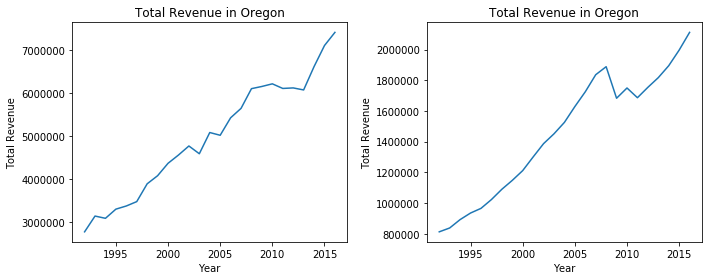

In [57]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(10,4))

sns.lineplot(x = 'YEAR', y = 'TOTAL_REVENUE', data = df_3[df_3['STATE']=='OREGON'], ax = axis1)
sns.lineplot(x = 'YEAR', y = 'TOTAL_REVENUE', data = df_3[df_3['STATE']=='VERMONT'], ax = axis2)

axis1.set_title('Total Revenue in Oregon')
axis2.set_title('Total Revenue in Oregon')


for ax in [axis1, axis2]:
    ax.set_ylabel('Total Revenue')
    ax.set_xlabel('Year')

plt.tight_layout()

Indeed, it looks like there are trends to follow.  

In [58]:
def get_finance_regression(year, state, finance):
    try:
        x = [year-2, year-1]
        y = [df_3[(df_3['YEAR'] == year-2) & (df_3['STATE'] == state)][finance].values[0], df_3[(df_3['YEAR'] == year-1) & (df_3['STATE'] == state)][finance].values[0]]
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        return slope * year + intercept 

    except:
        pass
    
for finance in finance_list:
    df_3.loc[df_3[finance].isnull(), finance] = df_3.loc[df_3[finance].isnull()].apply(lambda row: get_finance_regression(row['YEAR'], row['STATE'], finance), axis = 1)

In [59]:
print(tabulate([[i, df_3[i].isnull().sum()/df_3.shape[0] * 100, df_3[i].nunique()] for i in finance_list], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column                       |   Percent Missing |   Unique Values |
|------------------------------+-------------------+-----------------|
| TOTAL_REVENUE                |           10.7311 |            1325 |
| FEDERAL_REVENUE              |           10.7311 |            1326 |
| STATE_REVENUE                |           10.7311 |            1301 |
| LOCAL_REVENUE                |           10.7311 |            1326 |
| TOTAL_EXPENDITURE            |           10.7311 |            1326 |
| INSTRUCTION_EXPENDITURE      |           10.7311 |            1326 |
| SUPPORT_SERVICES_EXPENDITURE |           10.7311 |            1326 |
| OTHER_EXPENDITURE            |           10.7311 |            1274 |
| CAPITAL_OUTLAY_EXPENDITURE   |           10.7311 |            1326 |


#### 3.4 - Average Math and Reading Scores
Since math and reading scores are only taken every few years, it is appropriate to use the forward fill method.  I also use a back fill method because in some states, initial years did not have a score.

In [60]:
avg_scores_list = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [61]:
for state in states_all_list:
    for score in avg_scores_list:
        df_3.loc[(df_3['STATE']==state), score] = df_3.loc[(df_3['STATE']==state), score].fillna(method = 'ffill')
        df_3.loc[(df_3['STATE']==state), score] = df_3.loc[(df_3['STATE']==state), score].fillna(method = 'bfill')

In [62]:
print(tabulate([[i, df_3[i].isnull().sum()/df_3.shape[0] * 100, df_3[i].nunique()] for i in avg_scores_list], headers=['Column', 'Percent Missing', 'Unique Values'], tablefmt='orgtbl'))

| Column              |   Percent Missing |   Unique Values |
|---------------------+-------------------+-----------------|
| AVG_MATH_4_SCORE    |           10.7311 |             535 |
| AVG_MATH_8_SCORE    |           10.7311 |             531 |
| AVG_READING_4_SCORE |           10.7311 |             532 |
| AVG_READING_8_SCORE |           10.7311 |             497 |


### 4) This time, fill in the missing values using interpolation (extrapolation).
Again, this is similar to techniques applied in Question 3.  The main difference is that instead of using a regression to estimate values, I will be using interpolation.

In [63]:
df_4 = df.copy()
df_4['STATE'] = df_4['STATE'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
df_4['STATE'] = df_4['STATE'].apply(correct_states)
df_4 = df_4[df_4['STATE'] != 'DODOVERSEASANDDOMESTICCOMBINED']
df_4.reset_index(drop = True,inplace = True)

#### 4.1 - Enroll

In [64]:
df_4['ENROLL'].fillna(df_4['GRADES_ALL_G'], inplace = True)
df_4['GRADES_ALL_G'].fillna(df_4['ENROLL'], inplace = True)
df_4.drop('ENROLL', axis = 1, inplace = True)

#### 4.2 - Grades

In [65]:
df_4.drop(['GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G'], axis = 1, inplace = True)

In [66]:
for state in ['VIRGINISLANDS', 'BUREAUOFINDIANAFFAIRS', 'BUREAUOFINDIANEDUCATION', 'WYOMING']:
    condition = ((df_4['STATE'] == state) & (df_4['GRADES_1_8_G'].notnull()) & (df_4['GRADES_ALL_G'].isnull()))
    df_4.loc[condition, 'GRADES_ALL_G'] = df_4.loc[condition].apply(lambda row: est_grades_all(state, row['GRADES_1_8_G'], row['GRADES_9_12_G']), axis = 1)

In [67]:
for state in states_all_list:
    for grade in ['GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G']:
        df_4.loc[(df_4['STATE']==state), grade] = df_4.loc[(df_4['STATE']==state), grade].interpolate()

#### 4.3 - Revenue and Expenditures

In [68]:
df_4.loc[(df_3['OTHER_EXPENDITURE'].isnull() & df_4['TOTAL_REVENUE'].notnull()), 'OTHER_EXPENDITURE'] = df_4.loc[(df_3['OTHER_EXPENDITURE'].isnull() & df_4['TOTAL_REVENUE'].notnull()), 'OTHER_EXPENDITURE'].fillna(0)

In [69]:
for state in states_all_list:
    for finance in finance_list:
        df_4.loc[(df_4['STATE']==state), finance] = df_4.loc[(df_4['STATE']==state), finance].interpolate()

#### 4.4 - Average Math and Reading Scores

In [70]:
for state in states_all_list:
    for score in avg_scores_list:
        df_4.loc[(df_4['STATE']==state), score] = df_4.loc[(df_4['STATE']==state), score].interpolate()

### 5) Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?
For this problem, I will look at one or two columns from each type of variable.  The ones I've picked are total revenue, total expenditure, 'Grades 1_8', 'Grades all', 'Average math 4 score', and 'average reading 4 score'.

For the most part, the means and standard deviations from Questions 3 and 4 are more similar to each other than to Question 2, which makes sense are they both used regression to some degree.  This relationship breaks down for the 'Grades' variables however, since I used a different technique to impute these values for each question.  For all mins and maxes, all three techniques have similar numbers.  

In [74]:
col = 'TOTAL_REVENUE'
pd.concat([df_2[col], df_3[col], df_4[col]], axis = 1).describe()

,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE
count,1.331000e+03,1.331000e+03,1.331000e+03
mean,9.097656e+06,9.277468e+06,9.246804e+06
std,1.172267e+07,1.209706e+07,1.200350e+07
min,4.656500e+05,4.656500e+05,4.656500e+05
25%,2.189504e+06,2.207700e+06,2.200842e+06
50%,5.086083e+06,5.176362e+06,5.169926e+06
75%,1.084516e+07,1.111990e+07,1.109900e+07
max,8.921726e+07,1.001865e+08,8.921726e+07


In [75]:
col = 'TOTAL_EXPENDITURE'
pd.concat([df_2[col], df_3[col], df_4[col]], axis = 1).describe()

,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE
count,1.331000e+03,1.331000e+03,1.331000e+03
mean,9.204960e+06,9.371828e+06,9.342417e+06
std,1.196447e+07,1.227932e+07,1.220752e+07
min,4.816650e+05,4.816650e+05,4.816650e+05
25%,2.170404e+06,2.188797e+06,2.176975e+06
50%,5.259909e+06,5.298932e+06,5.298267e+06
75%,1.074420e+07,1.089196e+07,1.087317e+07
max,8.532013e+07,9.227431e+07,8.532013e+07


In [77]:
col = 'GRADES_1_8_G'
pd.concat([df_2[col], df_3[col], df_4[col]], axis = 1).describe()

,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G
count,1.491000e+03,1.471000e+03,1.487000e+03
mean,5.154950e+05,5.216306e+05,5.155512e+05
std,6.459917e+05,6.472240e+05,6.440470e+05
min,4.878000e+03,4.878000e+03,4.878000e+03
25%,1.034110e+05,1.096155e+05,1.071090e+05
50%,3.416110e+05,3.482330e+05,3.425530e+05
75%,6.100285e+05,6.124295e+05,6.100285e+05
max,4.113063e+06,3.929869e+06,3.929869e+06


In [78]:
col = 'GRADES_ALL_G'
pd.concat([df_2[col], df_3[col], df_4[col]], axis = 1).describe()

,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G
count,1.491000e+03,1.471000e+03,1.487000e+03
mean,7.785587e+05,7.924324e+05,7.828647e+05
std,9.797587e+05,9.882875e+05,9.847055e+05
min,7.254000e+03,7.254000e+03,7.254000e+03
25%,1.517590e+05,1.689155e+05,1.581165e+05
50%,5.172800e+05,5.307570e+05,5.239020e+05
75%,9.135800e+05,9.243010e+05,9.166340e+05
max,6.226523e+06,6.226523e+06,6.226523e+06


In [79]:
col = 'AVG_MATH_4_SCORE'
pd.concat([df_2[col], df_3[col], df_4[col]], axis = 1).describe()

,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE,AVG_MATH_4_SCORE
count,1331.000000,1331.000000,1277.000000
mean,236.795225,231.640394,232.814597
std,8.202102,11.133270,10.624230
min,187.134670,187.134670,187.134670
25%,232.983144,224.734462,226.521892
50%,238.821928,232.753710,234.531807
75%,242.257091,240.575489,240.979792
max,253.420961,253.420961,253.420961


In [80]:
col = 'AVG_READING_4_SCORE'
pd.concat([df_2[col], df_3[col], df_4[col]], axis = 1).describe()

,AVG_READING_4_SCORE,AVG_READING_4_SCORE,AVG_READING_4_SCORE
count,1331.000000,1331.000000,1250.000000
mean,219.298181,218.101584,218.415385
std,7.178784,8.032089,7.925924
min,178.557612,178.557612,178.557612
25%,215.235824,213.693918,214.240213
50%,221.220580,219.735395,220.066145
75%,223.814584,223.578325,223.838858
max,236.773867,236.773867,236.773867
